<a href="https://colab.research.google.com/github/mariamadalina/pytrends/blob/master/test_for_subtitles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from os.path import join
from google.colab import drive

ROOT = "/content/drive"
drive.mount(ROOT)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
PROJ = "My Drive/PhDColab/Workspace" # This is a custom path.
PROJECT_PATH = join(ROOT, PROJ)
!mkdir "{PROJECT_PATH}"
!git init "{PROJECT_PATH}"

mkdir: cannot create directory ‘/content/drive/My Drive/PhDColab/Workspace’: File exists
Initialized empty Git repository in /content/drive/My Drive/PhDColab/Workspace/.git/


In [0]:
GIT_USERNAME = "mariamadalina"
GIT_TOKEN = "8ff0a8ff9634362225cfaf100c674e053dca79a6"
GIT_REPOSITORY = "pytrends"
# https://github.com/mariamadalina/pytrends.git
!mkdir "{PROJECT_PATH}"
!git clone https://{GIT_TOKEN}@github.com/{GIT_USERNAME}/{GIT_REPOSITORY}.git "{PROJECT_PATH}"


mkdir: cannot create directory ‘/content/drive/My Drive/PhDColab/Workspace’: File exists
Cloning into '/content/drive/My Drive/PhDColab/Workspace'...
remote: Enumerating objects: 1647, done.
remote: Counting objects: 100% (1647/1647), done.
remote: Compressing objects: 100% (625/625), done.
remote: Total 1647 (delta 974), reused 1647 (delta 974), pack-reused 0
Receiving objects: 100% (1647/1647), 350.21 KiB | 2.13 MiB/s, done.
Resolving deltas: 100% (974/974), done.


In [0]:
from importlib.machinery import SourceFileLoader
pytrends = SourceFileLoader('pytrends', join(PROJECT_PATH, 'pytrends/__init__.py')).load_module()


In [0]:
category_identifier = pytrends.utils.CategoryRead()
google_trends={}
category='Food & Drink'
search_category='Autos & Vehicles'

category_identifier.get_categpry_id('Pets & Animals')

66

In [0]:
!pip install youtube_transcript_api
!pip install gensim
!pip install Word2Vec
!pip install nltk

In [0]:
from youtube_transcript_api import YouTubeTranscriptApi

In [0]:
transcript=YouTubeTranscriptApi.get_transcript('D_2DBLAt57c')
sentences = [sentence['text'] for sentence in transcript]

In [0]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
corpus = []
for sentence in sentences:
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', sentence)
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

['pasta', 'cream', 'bacon']
['cream']
['hi', 'guy', 'gonna', 'make', 'spaghetti', 'carbonara']
['classic', 'italian', 'dish', 'pasta']
['cheese', 'bacon', 'love', 'right']
['really', 'controversial']
['want', 'give', 'think', 'authentic', 'recipe']
['first', 'guy', 'need', 'five', 'ingredient']
['guanciale']
['cured', 'cheek', 'pork']
['see', 'fat']
['salted', 'got', 'pepper', 'dried', 'aged']
['course', 'similar', 'smoked', 'bacon']
['get', 'pretty', 'good', 'result', 'actually']
['see', 'quite', 'lean']
['try', 'get', 'cut', 'fat', 'need']
['pancetta']
['people', 'use', 'parmesan']
['actually', 'classic', 'pecorino', 'romano']
['sheep', 'cheese', 'crumbly', 'salty']
['free', 'range', 'organic', 'egg']
['pasta']
['black', 'pepper']
['optional', 'garlic']
['first', 'guy', 'grab', 'pasta', 'two', 'hand']
['twist', 'water']
['twisting', 'stick', 'together']
['put', 'tiny', 'amount', 'salt', 'water']
['cheese', 'guanciale', 'salty']
['beautiful', 'pasta', 'take', 'eight', 'minute', 'cook'

In [0]:
corpus

['pasta cream bacon',
 'cream',
 'hi guy gonna make spaghetti carbonara',
 'classic italian dish pasta',
 'cheese bacon love right',
 'really controversial',
 'want give think authentic recipe',
 'first guy need five ingredient',
 'guanciale',
 'cured cheek pork',
 'see fat',
 'salted got pepper dried aged',
 'course similar smoked bacon',
 'get pretty good result actually',
 'see quite lean',
 'try get cut fat need',
 'pancetta',
 'people use parmesan',
 'actually classic pecorino romano',
 'sheep cheese crumbly salty',
 'free range organic egg',
 'pasta',
 'black pepper',
 'optional garlic',
 'first guy grab pasta two hand',
 'twist water',
 'twisting stick together',
 'put tiny amount salt water',
 'cheese guanciale salty',
 'beautiful pasta take eight minute cook',
 'got guanciale',
 'gonna remove skin gonna take nice centimeter slice',
 'guanciale roughly chop',
 'half centimeter chunk',
 'pan cold',
 'turn medium high heat',
 'reason want cold want render fat',
 'guanciale go pan

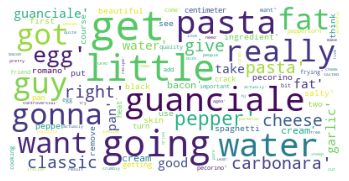

In [0]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.9,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)
list(cv.vocabulary_.keys())[:10]

['pasta',
 'cream',
 'bacon',
 'pasta cream',
 'cream bacon',
 'pasta cream bacon',
 'hi',
 'guy',
 'gonna',
 'make']

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[Text(0, 0, 'pasta'),
 Text(0, 0, 'guanciale'),
 Text(0, 0, 'get'),
 Text(0, 0, 'water'),
 Text(0, 0, 'fat'),
 Text(0, 0, 'want'),
 Text(0, 0, 'pepper'),
 Text(0, 0, 'egg'),
 Text(0, 0, 'little'),
 Text(0, 0, 'going'),
 Text(0, 0, 'guy'),
 Text(0, 0, 'pan'),
 Text(0, 0, 'cream'),
 Text(0, 0, 'gonna'),
 Text(0, 0, 'carbonara'),
 Text(0, 0, 'really'),
 Text(0, 0, 'got'),
 Text(0, 0, 'pecorino'),
 Text(0, 0, 'garlic'),
 Text(0, 0, 'bacon')]

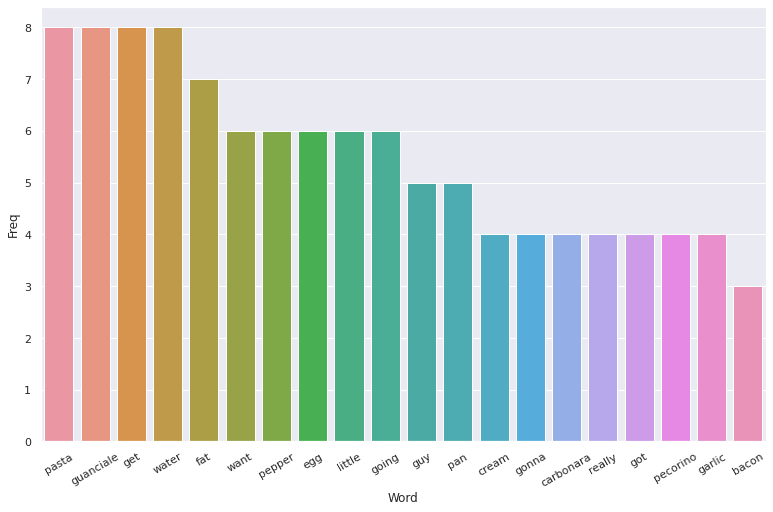

In [0]:
import pandas
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pandas.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                 Bi-gram  Freq
0    spaghetti carbonara     2
1              first guy     2
2        pecorino romano     2
3           black pepper     2
4              water fat     2
5            pasta cream     1
6            cream bacon     1
7                 hi guy     1
8              guy gonna     1
9             gonna make     1
10        make spaghetti     1
11       classic italian     1
12          italian dish     1
13            dish pasta     1
14          cheese bacon     1
15            bacon love     1
16            love right     1
17  really controversial     1
18             want give     1
19            give think     1


[Text(0, 0, 'spaghetti carbonara'),
 Text(0, 0, 'first guy'),
 Text(0, 0, 'pecorino romano'),
 Text(0, 0, 'black pepper'),
 Text(0, 0, 'water fat'),
 Text(0, 0, 'pasta cream'),
 Text(0, 0, 'cream bacon'),
 Text(0, 0, 'hi guy'),
 Text(0, 0, 'guy gonna'),
 Text(0, 0, 'gonna make'),
 Text(0, 0, 'make spaghetti'),
 Text(0, 0, 'classic italian'),
 Text(0, 0, 'italian dish'),
 Text(0, 0, 'dish pasta'),
 Text(0, 0, 'cheese bacon'),
 Text(0, 0, 'bacon love'),
 Text(0, 0, 'love right'),
 Text(0, 0, 'really controversial'),
 Text(0, 0, 'want give'),
 Text(0, 0, 'give think')]

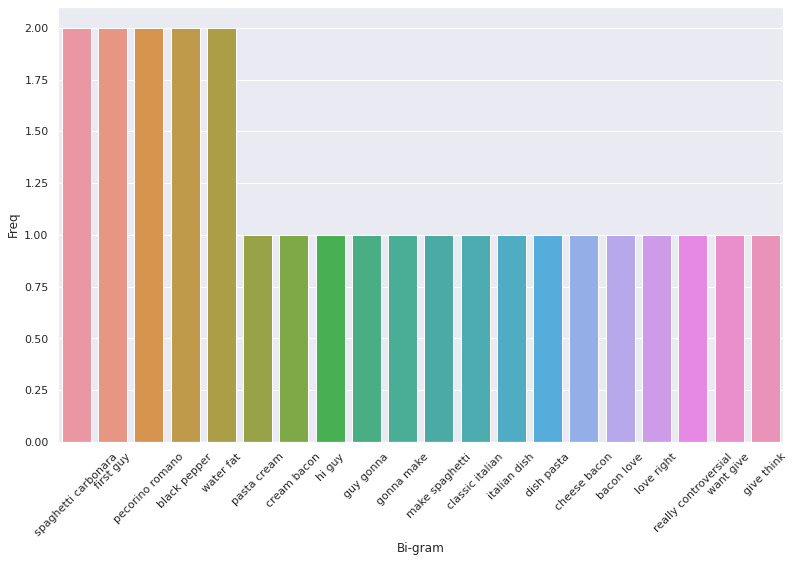

In [0]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pandas.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

In [0]:
#importing the libraries
from urllib.request import urlopen
from bs4 import BeautifulSoup


def get_tags(url):    
    webpage = urlopen(url).read()
    soup = BeautifulSoup(webpage, "lxml")
    for tag in soup.find_all("article") :
        id = tag.get('id')
        print(id)
    tag = soup.find_all("meta",  property="og:video:tag")
    return [x['content'] for x in tag]

print (get_tags('https://www.youtube.com/watch?v=D_2DBLAt57c'))

['jamie', 'oliver', 'cooking', 'food', 'cook', 'recipe', 'tube', 'chef', 'foodtube', 'jamieoliver', 'carbonara', 'bacon', 'pasta', 'cream', 'pork', 'pepper', 'spaghetti', 'pancetta', 'cheese', 'garlic', 'peppercorn', 'eggs', 'healthy', 'fresh', 'italian', 'hot', 'spicy', 'pastas', 'dinner', 'lunch', 'eating', 'homemade', 'healthy food', 'jamie oliver', 'creamy', 'simple', 'easy', 'dining', 'friends', 'family', 'italy', 'spaghetti carbonara', 'beautiful', 'pecorino', 'cheeses', 'quality', 'tasty', 'pasta dish', 'dishes', 'pasta recipe', 'recipes', 'quick']


In [0]:
!pip install spacy
!python -m spacy download en_core_web_md


     |████████████████████████████████| 96.4MB 2.7MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.5-cp36-none-any.whl size=98051305 sha256=917e231a601e3f9af5cfcc687e9e972f11daff0568dd135f4f52ae1474cf5849
  Stored in directory: /tmp/pip-ephem-wheel-cache-9ewt3cxt/wheels/df/94/ad/f5cf59224cea6b5686ac4fd1ad19c8a07bc026e13c36502d81
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [0]:
from collections import Counter
from string import punctuation

In [0]:
import en_core_web_md
nlp = en_core_web_md.load()

In [0]:
def get_hotwords(text):

    result = []

    pos_tag = ['PROPN', 'ADJ', 'NOUN'] # 1

    doc = nlp(text.lower()) # 2

    for token in doc:

        # 3

        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):

            continue

        # 4

        if(token.pos_ in pos_tag):

            result.append(token.text)

                

    return result # 5

In [0]:

keyword = []

pos_tag = ['PROPN', 'ADJ', 'NOUN', 'VERB']

doc = nlp(" ".join(sentences).lower()) #1

for token in doc: #2

    if(token.text in nlp.Defaults.stop_words or token.text in punctuation):

        continue #3

    if(token.pos_ in pos_tag):

        keyword.append(token.text) #4

In [0]:
get_hotwords(" ".join(sentences))

In [0]:
get_hotwords(" ".join(sentences))

In [0]:
get_hotwords(" ".join(sentences))